# Use Case for Hackathon

### We get a dataset, we have to understand it and get value from it

A school wants to hire us to see whether we are able to understand some problems they believe they are facing. 

Something is going wrong with the performance of the students but they are not able to figure it out and give reasons to it. 

Some parents are very disappointed of the grades of their kids and have complaint continiously to the board of the school. 

Our company is low on budget and we accept the deal even if it is risky, stressful and the money won't cover much of our runaway either but we take what we get. 

## Let's get to it and try to help the School!

### Import dataset and do the first general analysis

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv(r'C:\Users\marin\Downloads\exams_mod.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [34]:
df.describe()

,math score,reading score,writing score,id_student,address,Year,Age
count,1010.000000,1010.000000,1010.000000,1010.000000,0.0,1010.000000,943.000000
mean,66.420792,64.930693,70.289109,1494.599010,NaN,2021.104950,15.483563
std,15.481187,18.990769,19.125831,291.537945,NaN,7.681396,1.151707
min,13.000000,15.000000,23.000000,1000.000000,NaN,1990.000000,14.000000
25%,56.000000,54.000000,58.000000,1242.250000,NaN,2023.000000,14.000000
50%,66.000000,68.000000,68.000000,1494.500000,NaN,2023.000000,16.000000
75%,77.000000,78.000000,79.000000,1746.750000,NaN,2023.000000,17.000000
max,120.000000,100.000000,100.000000,1999.000000,NaN,2023.000000,17.000000


In [35]:
#aaddress, math score, id student, year

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


In [37]:
df.shape

(1010, 12)

In [38]:
Index["gender", "race/ethnicity",]

NameError: name 'Index' is not defined

## What information do we get from this? 

1. Why is student id int? If it is a string. It is not a number

2. We need to inspect all the object columns and check the value counts. What do we discover when we do it? 

3. The distribution of the year column is a bit odd. We need to look more into it. 

4. Do we have duplicates in the dataset?

5. All rows of the column address are missing, maybe we can just delete it

6. The age column has 77 missing values. What should we do with it? 

7. There seems to be values for the math scores higher than 120. Are those outliers? 

### 1. Change type of student id  

In [ ]:
df["id.student"] = df["id_student"].astype(str)

In [ ]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
id_student                       int64
address                        float64
Year                             int64
Age                            float64
id.student                      object
dtype: object

### 2. Explore the columns that are objects (string)

In [ ]:
object_columns = df_cleaned.select_dtypes(include=["object"]).columns

print(object_columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [ ]:
df["gender"] = df['gender'].str.upper()
df['gender'].value_counts()

gender
MALE      524
FEMALE    486
Name: count, dtype: int64

### 3. Seems that the column gender has a lot of versions we are going to have to fix this

In [52]:
# Primero unificamos los valores para que solo aparezca Male y Female
# Normalizar los valores de la columna "gender" para que solo haya "Female" y "Male"
df_cleaned["gender"] = df_cleaned["gender"].str.capitalize()

# Verificar los valores únicos después del cambio
df_cleaned["gender"].unique() 

array(['Male', 'Female'], dtype=object)

### 4. What may be happening with the year? 

In [ ]:
df['Year'].value_counts()

Year
2023    942
1990     58
Name: count, dtype: int64

In [ ]:
#assumim que s'han d'eliminar els valors 1990 perque es un error.
df['Year'] = df['Year'].replace(1990,2023)
df['Year'].value_counts()

Year
2023    1000
Name: count, dtype: int64

### 5. Do we have any duplicates? 

In [ ]:
df.shape

(1010, 13)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(1000, 13)

In [ ]:
#ha eliminat 10 duplicats.

### 6.1. Missing values: Remember the column address

In [ ]:
df.isna().sum()

gender                            0
race/ethnicity                    0
parental level of education       0
lunch                             0
test preparation course           0
math score                        0
reading score                     0
writing score                     0
id_student                        0
address                        1000
Year                              0
Age                              67
id.student                        0
dtype: int64

In [53]:
df = df.drop('address',axis=1)
if 'address' in df.columns:
    print('address no sirve para nada')
           

### 6.2. What about the missing values of the column Age? 

In [ ]:
# Reemplazamos los campos vacíos por la media del resto de valores
mean_Age = df["Age"].mean()

# Rellenar los valores vacíos con la media
df["Age"].fillna(mean_Age, inplace=True)

# Verificar si hay valores vacíos después del cambio
print(df["Age"].isnull().sum())

0


In [ ]:
#Imprimimos los primeros 26 valores para comprobarlo
print(df["Age"].head(26))

0     14.000000
1     17.000000
2     14.000000
3     17.000000
4     16.000000
5     16.000000
6     14.000000
7     17.000000
8     15.000000
9     16.000000
10    15.000000
11    16.000000
12    15.483563
13    17.000000
14    15.000000
15    15.000000
16    15.000000
17    17.000000
18    17.000000
19    15.000000
20    16.000000
21    15.483563
22    15.000000
23    15.000000
24    15.483563
25    16.000000
Name: Age, dtype: float64


### 7. What is going on with the math scores?

In [ ]:
#cuantos hay por encima de 100
df[df['math score']>100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age,id.student
11,FEMALE,group D,high school,standard,completed,120,87,100,1011,2023,16.0,1011


In [61]:
# Reemplazamos el valor 120 por 100 en la columna "math score"
df["math score"] = df["math score"].replace(120, 100)

# Verificar que el cambio se haya realizado
print(df["math score"].unique())

[ 67  40  59  77  78  63  62  93  47  99 100  74  81  69  58  54  23  39
  83  71  44  46  51  53  33  87  65  79  68  57  98  60  64  52  36  56
  88  42  76  49  72  31  32  97  94  95  45  75  66  70  82  92  30  41
  43  55  73  48  86  80  84  50  89  91  85  61  35  90  96  13  38  28
  26  37  29  34  25]


## Do some initial plots? EDA

math score
63    36
77    31
71    30
74    28
57    27
      ..
30     2
34     1
23     1
29     1
25     1
Name: count, Length: 77, dtype: int64


c:\Users\marin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


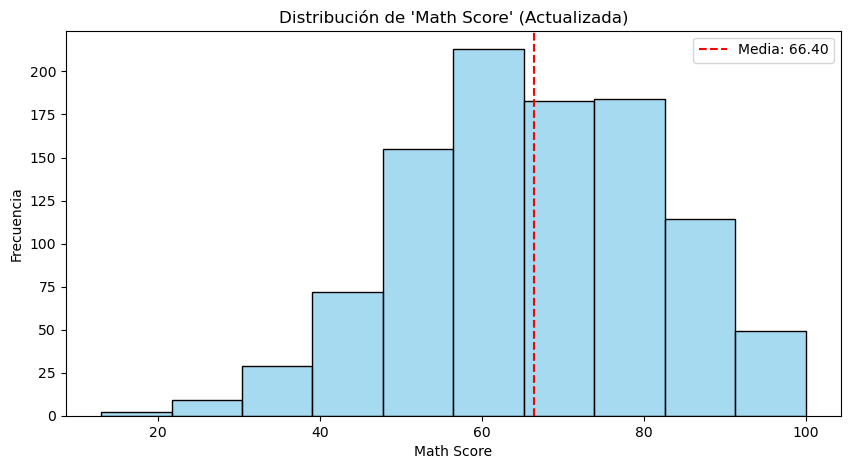

In [ ]:
# Volvemos a calcular la media de Math score substituyendo el valor 120 por 100 (ausmimos que se trata de un buen estudiante y que las otras dos notas son buenas) e imprimimos un gráfico con los valores y la media

df["math score"] = df["math score"].replace(120, 100)

# Verificar si el valor 120 sigue presente
print(df["math score"].value_counts())

# Volver a crear el histograma para "math score" después del reemplazo
plt.figure(figsize=(10, 5))
sns.histplot(df["math score"], bins=10, kde=False, color="skyblue")

# Calcular la media actualizada
mean_math_updated = df["math score"].mean()

# Agregar una línea vertical con la media
plt.axvline(mean_math_updated, color="red", linestyle="dashed", label=f"Media: {mean_math_updated:.2f}")

# Etiquetas y título
plt.xlabel("Math Score")
plt.ylabel("Frecuencia")
plt.title("Distribución de 'Math Score' (Actualizada)")
plt.legend()

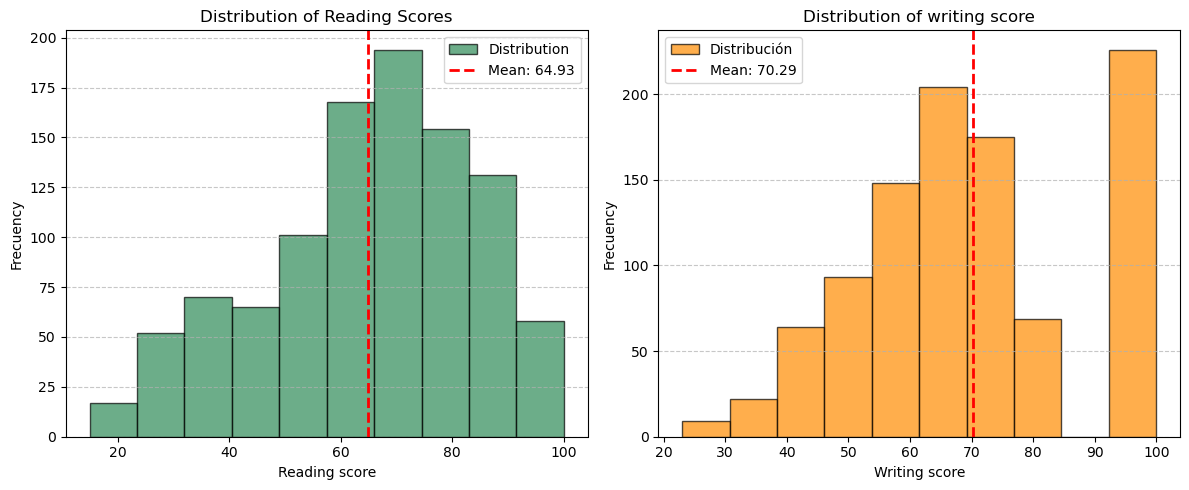

In [ ]:
# Hacemos lo mismo con las otras dos notas del listado
reading_mean = np.mean(df_cleaned["reading score"])
writing_mean = np.mean(df_cleaned["writing score"])

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para lectura con media
axes[0].hist(df_cleaned["reading score"], bins=10, color="seagreen", edgecolor="black", alpha=0.7, label="Distribution")
axes[0].axvline(reading_mean, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {reading_mean:.2f}")
axes[0].set_xlabel("Reading score")
axes[0].set_ylabel("Frecuency")
axes[0].set_title("Distribution of Reading Scores")
axes[0].legend()
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Histograma para escritura con media
axes[1].hist(df_cleaned["writing score"], bins=10, color="darkorange", edgecolor="black", alpha=0.7, label="Distribución")
axes[1].axvline(writing_mean, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {writing_mean:.2f}")
axes[1].set_xlabel("Writing score")
axes[1].set_ylabel("Frecuency")
axes[1].set_title("Distribution of writing score")
axes[1].legend()
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Ajustar el diseño
plt.tight_layout()
plt.show()

### What do you find interesting?  

- To me the reading score is really intriguing --> We need to really work on understanding what is going on
- The writing score is also characteristic but in principle I am not that worried about it. 

#### We know for a fact that the id_student and the year will not be relevant for any analysis as they are the same value for the whole dataset

Maybe we can delete them from now on

In [28]:
# Eliminar las columnas "id_student" y "Year"
df_cleaned = df.drop(columns=["id_student", "Year"], errors="ignore")

# Verificar las columnas restantes
df_cleaned.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,address,Age
0,Male,group A,high school,standard,completed,67,67,63,NaN,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,NaN,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,NaN,14.0
3,Male,group B,high school,standard,none,77,78,68,NaN,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,NaN,16.0


#### What do we care about? The grades are the main problem. Maybe they vary based on any of the other variables

I think we can detect the biggest discrepancies at 3-4 levels: 

- Parental level of education 

- Test preparation course 

- Mybe lunch or gender (I am pretty sure the lunch should not have that much impact but let's still check it)

Let's go deeper

 



### 2-variable Analysis with Lunch column 

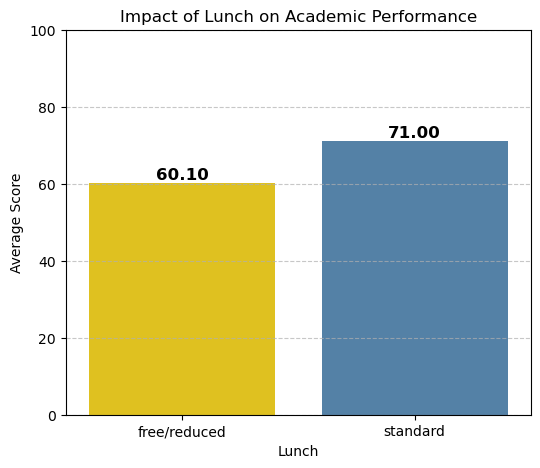

In [62]:
df_cleaned["average score"] = df_cleaned[["math score", "reading score", "writing score"]].mean(axis=1)
lunch_avg = df_cleaned.groupby("lunch")["average score"].mean()

# Crear el gráfico de barras
plt.figure(figsize=(6, 5))
sns.barplot(x=lunch_avg.index, y=lunch_avg.values, palette=["gold", "steelblue"])

# Agregar etiquetas y título
plt.xlabel("Lunch")
plt.ylabel("Average Score")
plt.title("Impact of Lunch on Academic Performance")
plt.ylim(0, 100)  # Ajustar el rango del eje Y
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar valores en las barras
for index, value in enumerate(lunch_avg.values):
    plt.text(index, value + 1, f"{value:.2f}", ha="center", fontsize=12, fontweight="bold")

# Mostrar gráfico
plt.show()

In [ ]:
# hay una diferencia de 11 puntos a favor de los estudiantes que pagan la tarifa standard para la comida.

### 2-variable Analysis with gender column 

In [47]:
# Primero unificamos los valores para que solo aparezca Male y Female
# Normalizar los valores de la columna "gender" para que solo haya "Female" y "Male"
df_cleaned["gender"] = df_cleaned["gender"].str.capitalize()

# Verificar los valores únicos después del cambio
df_cleaned["gender"].unique() 

array(['Male', 'Female'], dtype=object)

<Figure size 800x500 with 0 Axes>

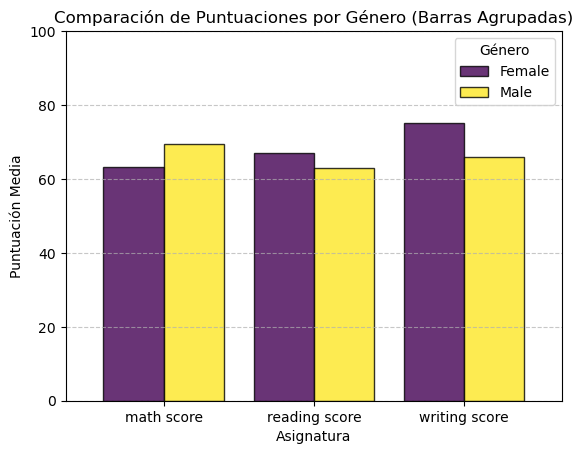

In [ ]:
# A continuación creamos un gráfico separando las medias por asignatura y por sexo
gender_avg = df_cleaned.groupby("gender")[["math score", "reading score", "writing score"]].mean()
plt.figure(figsize=(8, 5))
gender_avg.T.plot(kind="bar", colormap="viridis", edgecolor="black", alpha=0.8, width=0.8)

# Configurar etiquetas y título
plt.xlabel("Asignatura")
plt.ylabel("Puntuación Media")
plt.title("Comparación de Puntuaciones por Género (Barras Agrupadas)")
plt.ylim(0, 100)  # Ajustar el rango del eje Y
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Género")

# Mostrar gráfico
plt.show()

### 2-variable Analysis with Test preparation course column 

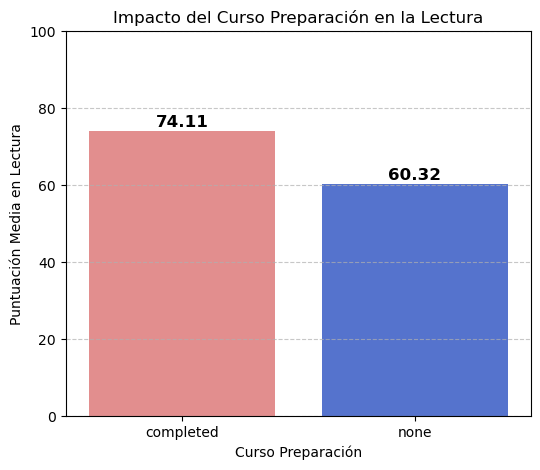

In [45]:
import seaborn as sns

# Calcular la media de lectura según la participación en el curso preparatorio
reading_prep = df_cleaned.groupby("test preparation course")["reading score"].mean()

# Crear el gráfico de barras
plt.figure(figsize=(6, 5))
sns.barplot(x=reading_prep.index, y=reading_prep.values, palette=["lightcoral", "royalblue"])

# Agregar etiquetas y título
plt.xlabel("Curso Preparación")
plt.ylabel("Puntuación Media en Lectura")
plt.title("Impacto del Curso Preparación en la Lectura")
plt.ylim(0, 100)  # Ajustar el rango del eje Y
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar valores en las barras
for index, value in enumerate(reading_prep.values):
    plt.text(index, value + 1, f"{value:.2f}", ha="center", fontsize=12, fontweight="bold")

# Mostrar gráfico

In [ ]:
# Los estudiantes que terminaron el curso de lectura, tienen de media unos 14 puntos más.

### What is next?

- Get the story together
- Improve your code
- Get some statistics of the differences you want to show 
- Work on the plots to show the data nicely 
- Get the presentation ready 
- Show what you found to the client

In [ ]:
# Como counclusión, tenemos que los resultados en lectura son los más bajos de los tres analizados, con una media de 64.93 puntos. Para subirlos, se podría incitar más a la lectura o ayudar a la comprensión lectora.
# Vemos que la diferencia entre los alumnos que finalizan el curso de preparión es casi 14 puntos superior a los que no lo finalizan. Se debería insistir en la realización de este curso a todo el alumnado.
# Los alumnos que tienen la comida subvencionada tienen unos resultados de aproximadamente 11 puntos por debajo del resto. Habría que indagar más: son familias con pocos recursos económicos, quienes están subvencionadas? La calidad de la comida, es la misma? comen todos juntos, subvencionados y no subvencionados?
# Los chicos tienen mejores notas en matemáticas, mientras que las chicas les superan en lectura y escritura. Se podría estudiar dedicar algunas jornadas a asignaturas STEM para chicas o introducir libros con temáticas más tendencialmente masculinas (por ejemplo, deportes) para que empiecen con el hábito de la lectura.